In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

import sys
sys.path.append("../game")
from tic_tac_toe import Game, RandomPlayer, QPlayer

In [4]:
# Train on a different number of games and look at the results from 10000 games
g = Game()
games_list = np.logspace(1, 5.5, num=200, dtype="int")
games_list = np.unique(games_list)
results = ([],  # QPlayer vs. QPlayer
           [],  # QPlayer vs. RandomPlayer
           [])  # RandomPlayer vs. QPlayer

for i in tqdm(range(len(games_list))):
    games = games_list[i]
    p1, p2 = g.train_ai(games, False)
    for k in range(3):
        if k == 0:
            res = (g.play_ai(p1, p2, 10000, False))
        elif k == 1:
            res = (g.play_ai(p1, RandomPlayer(), 10000, False))
        elif k == 2:
            res = (g.play_ai(RandomPlayer(), p2, 10000, False))
            
        p1_wins = res.count(1) / 10000
        p2_wins = res.count(2) / 10000
        draws = res.count(0) / 10000
        results[k].append([[games, p1_wins, p2_wins, draws]])

100%|██████████| 196/196 [07:26<00:00,  2.28s/it]


<AxesSubplot:title={'center':'QPlayer vs. RandomPlayer'}, xlabel='games'>

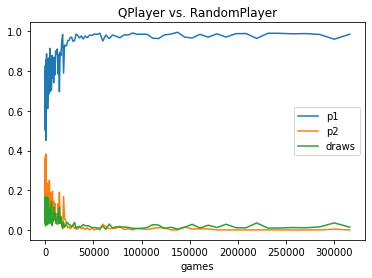

In [5]:
# Plots for QPlayer vs. RandomPlayer
qr = pd.DataFrame(np.concatenate(results[1]), columns=["games", "p1", "p2", "draws"])
qr.set_index("games", inplace=True)
qr[["p1", "p2", "draws"]].plot(title="QPlayer vs. RandomPlayer")

<AxesSubplot:title={'center':'RandomPlayer vs. QPlayer'}, xlabel='games'>

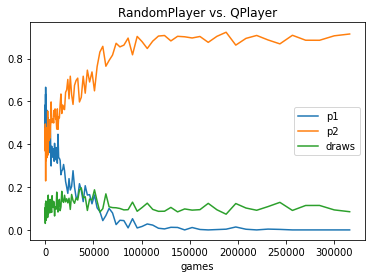

In [6]:
# Plots for RandomPlayer vs. QPlayer
rq = pd.DataFrame(np.concatenate(results[2]), columns=["games", "p1", "p2", "draws"])
rq.set_index("games", inplace=True)
rq[["p1", "p2", "draws"]].plot(title="RandomPlayer vs. QPlayer")

<AxesSubplot:title={'center':'QPlayer vs. QPlayer'}, xlabel='games'>

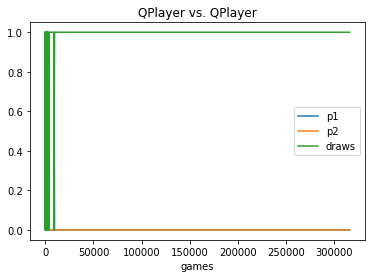

In [7]:
# Plots for QPlayer vs. QPlayer
qq = pd.DataFrame(np.concatenate(results[0]), columns=["games", "p1", "p2", "draws"])
qq.set_index("games", inplace=True)
qq[["p1", "p2", "draws"]].plot(title="QPlayer vs. QPlayer")